In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
SNAP = pd.read_csv('SNAP_Store_Locations.csv')

In [3]:
SNAP.shape

(244861, 13)

In [4]:
SNAP.head()

,X,Y,ObjectId,Store_Name,Address,Address_Line__2,City,State,Zip5,Zip4,County,Longitude,Latitude
0,-82.055046,32.396797,1,DOLLARTREE 8500,978 SE Broad St,NaN,Metter,GA,30439,3933,CANDLER,-82.055046,32.396797
1,-83.405739,42.332569,2,Meijer Gas Station 68,37201 Warren Rd,NaN,Westland,MI,48185,7219,WAYNE,-83.405739,42.332569
2,-84.418816,38.020084,3,Meijer Gas Station 161,2145 Sir Barton Way,NaN,Lexington,KY,40509,2203,FAYETTE,-84.418816,38.020084
3,-81.988991,41.461140,4,Mejier Gas Station 308,1820 Nagel Rd,NaN,Avon,OH,44011,1442,LORAIN,-81.988991,41.461140
4,-88.201988,41.632893,5,Meijer Gas Station 214,13705 S Route 59,NaN,Plainfield,IL,60544,6106,WILL,-88.201988,41.632893


In [5]:
SNAP_portland = SNAP.loc[SNAP['City'] == 'Portland']

In [6]:
SNAP_portland.tail()

,X,Y,ObjectId,Store_Name,Address,Address_Line__2,City,State,Zip5,Zip4,County,Longitude,Latitude
243134,-122.682330,45.594505,243135,Delta Mini Market,9930 N Whitaker Rd,NaN,Portland,OR,97217,7702,MULTNOMAH,-122.682330,45.594505
243624,-70.283096,43.671707,243625,Makkah Market LLC/ Makkah Halal Market,34 Vannah Ave,NaN,Portland,ME,4103,4557,CUMBERLAND,-70.283096,43.671707
243973,-122.682810,45.522633,243974,Peterson's Grocery 1,1143 SW Harvey Milk St,NaN,Portland,OR,97205,2309,MULTNOMAH,-122.682810,45.522633
244084,-122.685340,45.529758,244085,Basics Market - Lovejoy,938 NW 14th Ave,NaN,Portland,OR,97209,2704,MULTNOMAH,-122.685340,45.529758
244266,-122.621770,45.533512,244267,Target Store T3358,4030 NE Halsey St,NaN,Portland,OR,97232,1833,MULTNOMAH,-122.621770,45.533512


In [7]:
SNAP_portland = SNAP_portland.loc[SNAP_portland['State'] == 'OR']

In [8]:
SNAP_portland.sample()

,X,Y,ObjectId,Store_Name,Address,Address_Line__2,City,State,Zip5,Zip4,County,Longitude,Latitude
94531,-122.56028,45.559341,94532,PARKROSE SHELL,9920 NE Sandy Blvd,NaN,Portland,OR,97220,3322,MULTNOMAH,-122.56028,45.559341


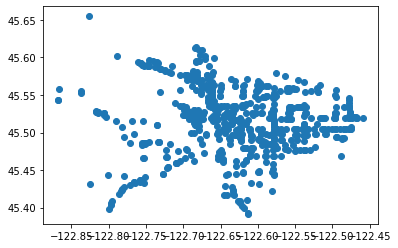

In [9]:
plt.scatter(x=SNAP_portland['Longitude'], y=SNAP_portland['Latitude'])
plt.show()

In [10]:
import folium
latitude = SNAP_portland.Latitude.mean()
longitude = SNAP_portland.Longitude.mean()
snap_portland = folium.Map(location=[latitude,longitude],zoom_start=12)
for index, row in SNAP_portland.iterrows():
    folium.Marker(
    [row.Latitude, row.Longitude], popup=row.Store_Name, tooltip=row.Store_Name
    ).add_to(snap_portland)

snap_portland

In [11]:
SNAP_cheyenne = SNAP.loc[SNAP['City'] == 'Cheyenne']
SNAP_cheyenne = SNAP_cheyenne.loc[SNAP_cheyenne['State'] == 'WY']
SNAP_cheyenne.sample()

,X,Y,ObjectId,Store_Name,Address,Address_Line__2,City,State,Zip5,Zip4,County,Longitude,Latitude
211266,-104.80087,41.111004,211267,SAFEWAY 2667,700 S Greeley Hwy,NaN,Cheyenne,WY,82007,2848,LARAMIE,-104.80087,41.111004


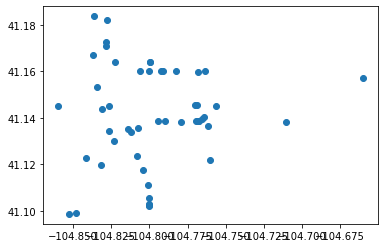

In [12]:
plt.scatter(x=SNAP_cheyenne['Longitude'], y=SNAP_cheyenne['Latitude'])
plt.show()

In [13]:
latitude = SNAP_cheyenne.Latitude.mean()
longitude = SNAP_cheyenne.Longitude.mean()
snap_cheyenne = folium.Map(location=[latitude,longitude],zoom_start=12)
for index, row in SNAP_cheyenne.iterrows():
    folium.Marker(
    [row.Latitude, row.Longitude], popup=row.Store_Name, tooltip=row.Store_Name
    ).add_to(snap_cheyenne)

snap_cheyenne